In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# this function train a model , after transforming a data into a specifc degrees , 
# return the trained model , and the prediction on the train set and the test set 

def reg_model (X_train, X_test, y_train, y_test, degrees , Model):
    # transfomer les données en degrees superieur
    X_data_poly = PolynomialFeatures(degree=degrees).fit_transform(X_train)
    
    regression_model = Model.fit(X_data_poly, y_train)
     
    # faire un prediction 
    pred_train = regression_model.predict(X_data_poly)
    
    # transformer the features in the test set 
    X_data_test_poly = PolynomialFeatures(degree=degrees).fit_transform(X_test)
    
    # faire les predictions on the test set 
    pred_test = regression_model.predict(X_data_test_poly)
    
    
    # calcul the training error here also 
    
    print("*****************Evaluation de la performance du modèle sur l'ensemble d'entrainement*****************")
    print("MAE_Train=",mean_absolute_error(y_train,pred_train))
    print("MSE_Train=",mean_squared_error(y_train,pred_train))
    print("RMSE_Train=",mean_squared_error(y_train,pred_train,squared=False))
    print("R-squared_Train=",r2_score(y_train,pred_train))
    
    
    # calcul of the test error here also 
    
    print("*****************Evaluation de la performance du modèle sur l'ensemble de test *****************")
    print("MAE_Test=",mean_absolute_error(y_test,pred_test))
    print("MSE_Test=",mean_squared_error(y_test,pred_test))
    print("RMSE_Test=",mean_squared_error(y_test,pred_test,squared=False))
    print("R-squared_Test=",r2_score(y_test,pred_test))
    
    
    return regression_model, pred_train, pred_test

# Exploration Et Visualization des Données

In [3]:
#Chargez l'ensemble de données sur le logement de Boston à partir de sklearn.datasets
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# transformer the data into dataframe
data = pd.DataFrame(data=boston_dataset["data"], columns=boston_dataset["feature_names"])

In [7]:
# add the target variable to the dataFrame
data["MEDV"] = boston_dataset["target"]

In [4]:
# une description des données 
print(boston_dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# des informations statéstiques 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


first look of the data : 

    1. no missing values 
    2. all features are numeric (no categorical varibales )
    3. 506 samples , so it's a small dataset by machine learning standard 

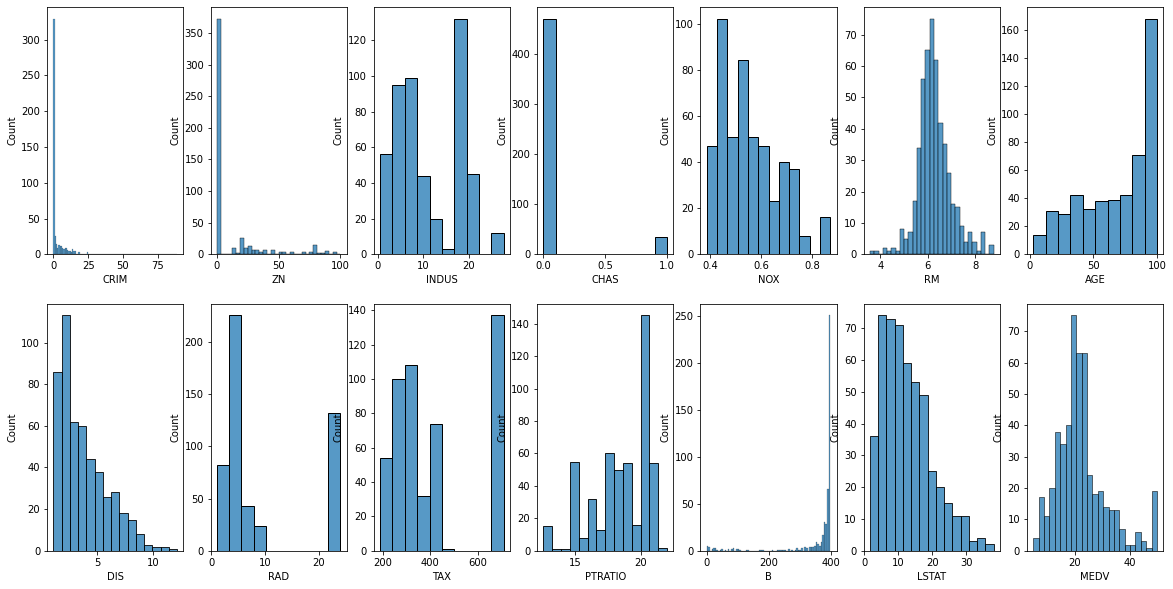

In [24]:
# plottingt the histogram to see the distrubution of every varibale 

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1



The histogram  shows that columns CRIM, ZN, B has highly skewed distributions. 
Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have normal or bimodel ditribution of data except CHAS (which is a discrete variable).


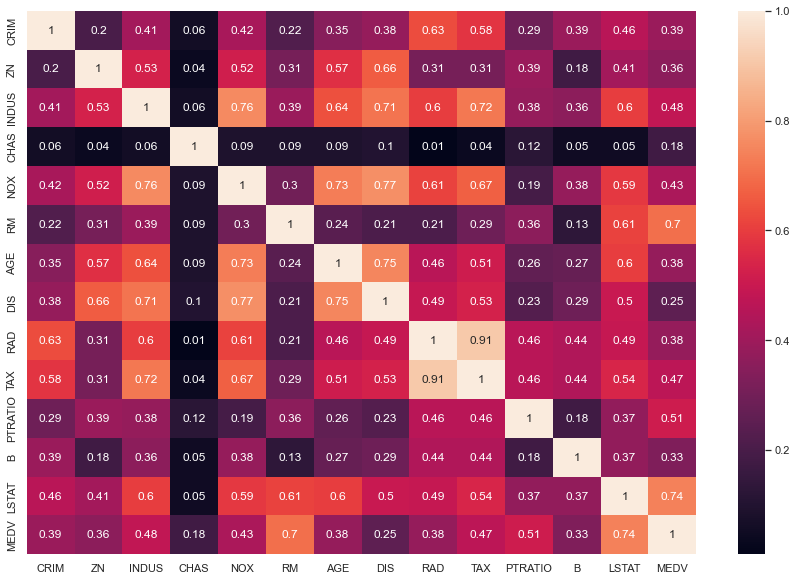

In [28]:
# the correlation matrix 
sns.set(rc={'figure.figsize':(15,10)})
correlation_matrix = data.corr().round(2).abs()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above or close to  0.5 with MEDV which is a good indication of using as predictors

# Data-Preproccessing 

### Feature selection based on the data analysis 

In [29]:
# based on the analysis above we gonna choose , in a moment the following  features
# later on we gonna use the lasso model to choose the inmportant features automatically 

features = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'RAD', 'AGE']

target = "MEDV"
# the dependent variables
X = data[features]

# the target variable 
y= data[target]

In [36]:
# split the data into train and test data 
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling 

In [55]:
# doing the feature scaling only for the depedent variables and only on the train set 
# we shoud use the same the scaller for the test set 

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit_transform(X_train)
X_train_scaled =pd.DataFrame(data=min_max_scaler.fit_transform(X_train), columns=features)
X_test_scaled =pd.DataFrame(data=min_max_scaler.fit_transform(X_test), columns=features)

In [56]:
X_train_scaled.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,RAD,AGE
0,0.639625,0.642963,0.471193,0.808511,0.293065,0.914122,1.000000,0.972194
1,0.185982,0.274074,0.314815,0.893617,0.400854,0.229008,0.130435,0.552008
2,0.168322,0.197037,0.108848,0.457447,0.440919,0.223282,0.000000,0.210093
3,0.594923,0.642963,0.471193,0.808511,0.455562,0.914122,1.000000,0.846550
4,0.263521,0.274074,0.314815,0.893617,0.379093,0.229008,0.130435,0.685891


In [65]:
from sklearn.linear_model import LinearRegression

model, pred_train, pred_test = reg_model(X_train_scaled,X_test_scaled, y_train, y_test, 1 ,LinearRegression())

*****************Evaluation de la performance du modèle sur l'ensemble d'entrainement*****************
MAE_Train= 3.657767857848485
MSE_Train= 26.19855180419299
RMSE_Train= 5.118452090641563
R-squared_Train= 0.6984283952477763
*****************Evaluation de la performance du modèle sur l'ensemble de test *****************
MAE_Test= 4.562035403121009
MSE_Test= 32.41058441063134
RMSE_Test= 5.693029458085681
R-squared_Test= 0.558040196292955


the linear model is doing a really good job , with an MAE on the train set = 3.65 and on the test set = 4.56 

### Script to Train Different Model with Different  Degrees 

In [71]:
# this fuction train a model (Linear model or another model ) , 
# and return the MAE for the trainSet and the testSet 

def train_model (X_train, X_test, y_train, y_test, degrees , Model):
    # transfomer les données en degrees superieur
    X_data_poly = PolynomialFeatures(degree=degrees).fit_transform(X_train)
    
    regression_model = Model.fit(X_data_poly, y_train)
     
    # faire un prediction 
    pred_train = regression_model.predict(X_data_poly)
    
    # transformer the features in the test set 
    X_data_test_poly = PolynomialFeatures(degree=degrees).fit_transform(X_test)
    
    # faire les predictions on the test set 
    pred_test = regression_model.predict(X_data_test_poly)
    
    return mean_absolute_error(y_train,pred_train), mean_absolute_error(y_test,pred_test)
    

In [72]:
mae_train = [] 
mae_test = []

for degree in range(1, 6):
    a, b = train_model(X_train, X_test, y_train, y_test, degree, LinearRegression())
    mae_train.append(a)
    mae_test.append(b)

#### Plotting the Train Error and the Test error for the different model with the different degrees 

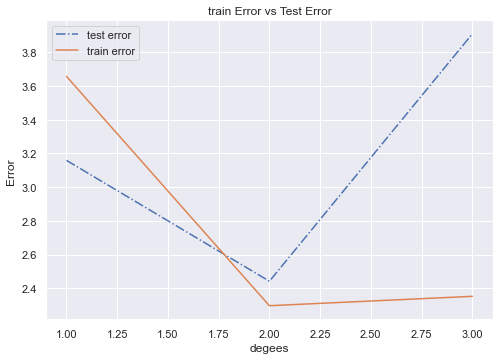

In [124]:
plt.rcParams["figure.figsize"] = (8,5.5)
plt.plot([1,2,3], mae_test[0:3], "-." )
plt.plot([1,2,3],mae_train[:3])

# Function add a legend  
plt.legend(["test error", "train error"], )

plt.xlabel("degees")
plt.ylabel("Error ")
plt.title("train Error vs Test Error")
plt.show()

as we can see the Linear regression with the degree = 2 ,  gives a good result on both and the train and test set 

## Using Cross-Validation to Evaluate performance 

In [155]:
# because we have a small dataSet , we don't gonna to split the data into trainset and testset on the cross validation 
# we gonna the data whitout splitting 

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# this function scale the data 
def scale_data (X, features) :
    mn = MinMaxScaler()
    mn.fit_transform(X)
    X_scaled = pd.DataFrame(data=mn.fit_transform(X), columns=features)
    return X_scaled

def doing_cross_validation(models, X, y):
    scores_mean = []
    for model in models :
        scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        scores_mean.append((-scores).mean())
    return scores_mean 

In [140]:
# scale the data 
features = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'RAD', 'AGE']
X_scaled = scale_data(X, features)

In [156]:
# a script which use validation on a multiple model 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
scores_mean = []
# cross validation on linear regression model with different degrees 
for degree in range(1, 6) :
    # transfomer les données en degrees superieur
    X_data_poly = PolynomialFeatures(degree=degree).fit_transform(X_scaled)
    scores_mean += doing_cross_validation([LinearRegression()], X_data_poly, y)

# cross validation using the Lasso and Ridge Linear models 
models = [Lasso(alpha=1e-2), Ridge(alpha=1e-2)]
scores_mean += doing_cross_validation(models,X_scaled, y )

In [157]:
# this the MSE for the different model , the last two are the Lasso and Ridge models 
scores_mean

[38.806997468229454,
 42.750645744276106,
 3413.653756160226,
 2.557258584833066e+17,
 2451683685377202.5,
 38.842883897380595,
 38.76688773333234]

as a conclusion we can say that the simple  linear regression with degree = 1 or the lasso or the ridge model are the good ones from the other linear models for that particular problem  

### Feature Selection based on the Lasso model

In [159]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import train_test_split

lasso = Lasso(alpha=0.1)

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

target = "MEDV"
# the dependent variables
X = data[features]

# the target variable 
y= data[target]

# split the data into train and test data 
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the data 
X_train_scaled = scale_data(X_train, features)
X_test_scaled = scale_data(X_test, features)


lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [160]:
lasso.coef_

array([ -0.        ,   0.        ,  -0.        ,   2.11854596,
        -0.        ,  20.72683473,  -0.        ,  -1.97704304,
        -0.        ,  -1.10008932,  -6.50376686,   3.53977148,
       -18.6610809 ])

<BarContainer object of 13 artists>

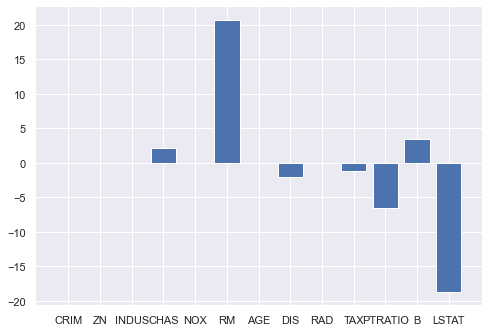

In [161]:
plt.bar(features, lasso.coef_)

### Working with the Selected Features 

In [162]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import train_test_split

lasso = Lasso(alpha=0.1)

features = [  'CHAS',  'RM', 'DIS',  'TAX', 'PTRATIO', 'B', 'LSTAT']

target = "MEDV"
# the dependent variables
X = data[features]

# the target variable 
y= data[target]

# split the data into train and test data 
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the data 
X_train_scaled = scale_data(X_train, features)
X_test_scaled = scale_data(X_test, features)

In [163]:
# a script which use validation on a multiple model 

# working with the data without splitting 
X_scaled = scale_data(X, features)

from sklearn.linear_model import LinearRegression, Lasso, Ridge 
scores_mean = []
# cross validation on linear regression model with different degrees 
for degree in range(1, 6) :
    # transfomer les données en degrees superieur
    X_data_poly = PolynomialFeatures(degree=degree).fit_transform(X_scaled)
    scores_mean += doing_cross_validation([LinearRegression()], X_data_poly, y)

# cross validation using the Lasso and Ridge Linear models 
models = [Lasso(alpha=1e-2), Ridge(alpha=1e-2)]
scores_mean += doing_cross_validation(models,X_scaled, y )

In [164]:
scores_mean

[33.64416441571102,
 8.94670833562193e+26,
 2.4879440204081044e+27,
 3433936.4210758163,
 78656677803824.34,
 34.04493357407266,
 33.61900833506532]

## Conclusion 

1. the data analysis gives almost the same features 
2. the linear regression with degree = 1 , the lasso or the ridge models are the good ones 
3. the Linear regression gives an MSE of : 33.64 